Tehreem Qasim tehreemqasim@hotmail.com

#Emplpyee Churn Prediction Dataset

In [32]:
import pandas as pd
df = pd.read_csv("/kaggle/input/employee-dataset/Employee.csv")

In [33]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [35]:
#Missing values
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [36]:
#Total rows in the dataset
len(df)

4653

In [37]:
#Duplicated rows
df.duplicated().sum()

1889

In [38]:
df = df.drop_duplicates()


In [39]:
len(df)

2764

In [40]:
#Splitting the target variable and the featrues
X = df.drop("LeaveOrNot", axis = 1)
y = df["LeaveOrNot"]

In [41]:
#Checking categorical feature labels for consistency
X.Education.unique()


array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [42]:
X.City.unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [43]:
X.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [44]:
X.EverBenched.unique()

array(['No', 'Yes'], dtype=object)

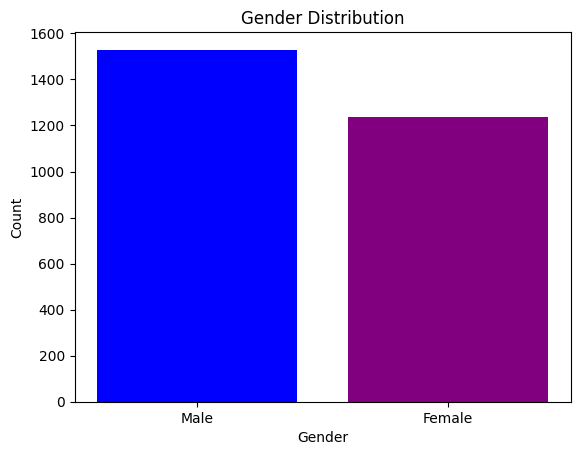

In [45]:
#Gender distribution
from matplotlib import pyplot as plt
import seaborn as sns


plt.bar(X.Gender.unique(), [len(X.Gender.loc[X.Gender=='Male']),len(X.Gender.loc[X.Gender=='Female'])],
        color=['blue', 'purple'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

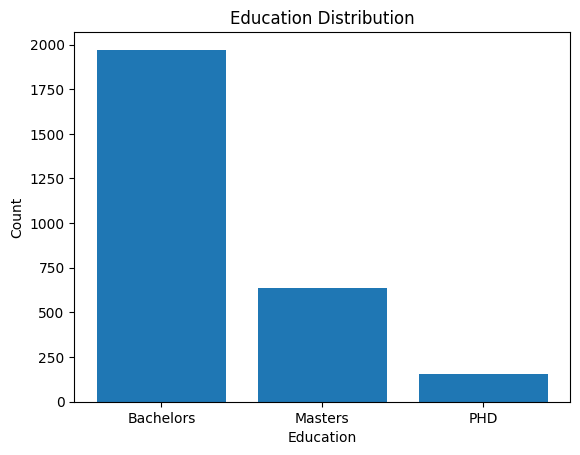

In [46]:
#Education distribution
#['Bachelors', 'Masters', 'PHD']
plt.bar(X.Education.unique(), [len(X.Education.loc[X.Education==x]) for x in X.Education.unique()])

plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

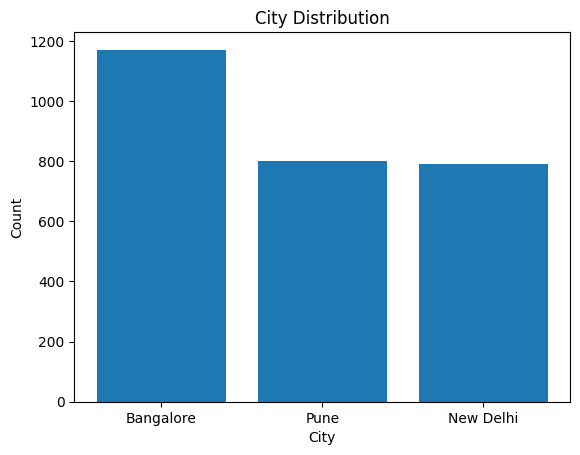

In [47]:
#Representation from different cities in the dataset



plt.bar(X.City.unique(), [len(X.City.loc[X.City==x]) for x in X.City.unique()])


plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

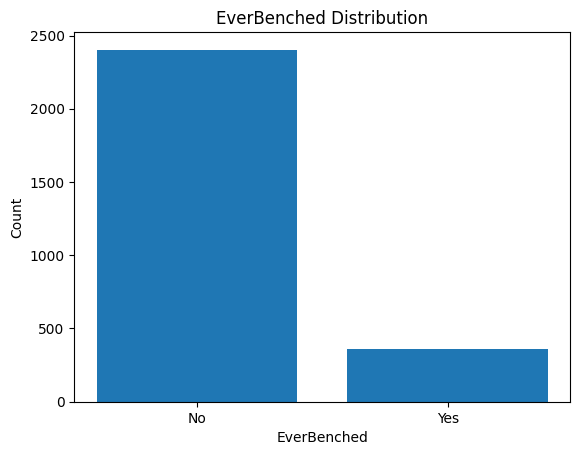

In [48]:
#EverBenched analysis

#['Bachelors', 'Masters', 'PHD']
plt.bar(X.EverBenched.unique(), [len(X.EverBenched.loc[X.EverBenched==x]) for x in X.EverBenched.unique()])

plt.title('EverBenched Distribution')
plt.xlabel('EverBenched')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

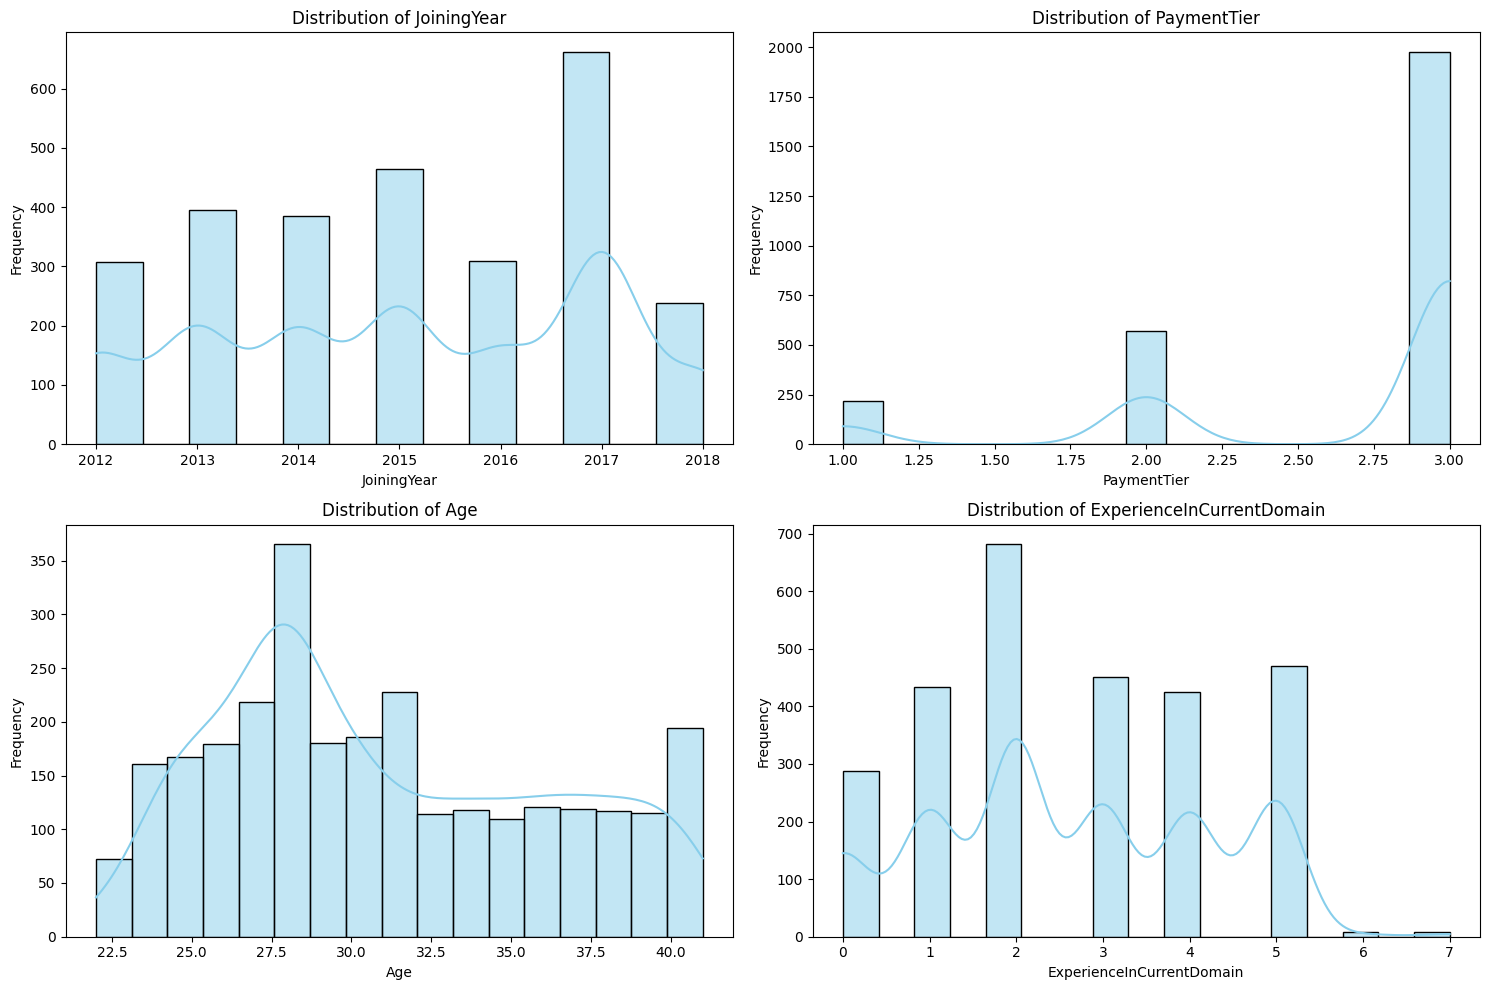

In [49]:
#Plotting histograms of non cateogircal columns
import seaborn as sns

non_categorical_columns = X.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(nrows=(len(non_categorical_columns) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(non_categorical_columns) + 1) // 2)))
axes = axes.flatten()
for i, col in enumerate(non_categorical_columns):
    sns.histplot(X[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hiding any unused subplots
for j in range(len(non_categorical_columns), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


In [50]:
object_columns = X.select_dtypes(include=['object']).columns
print(object_columns)


Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


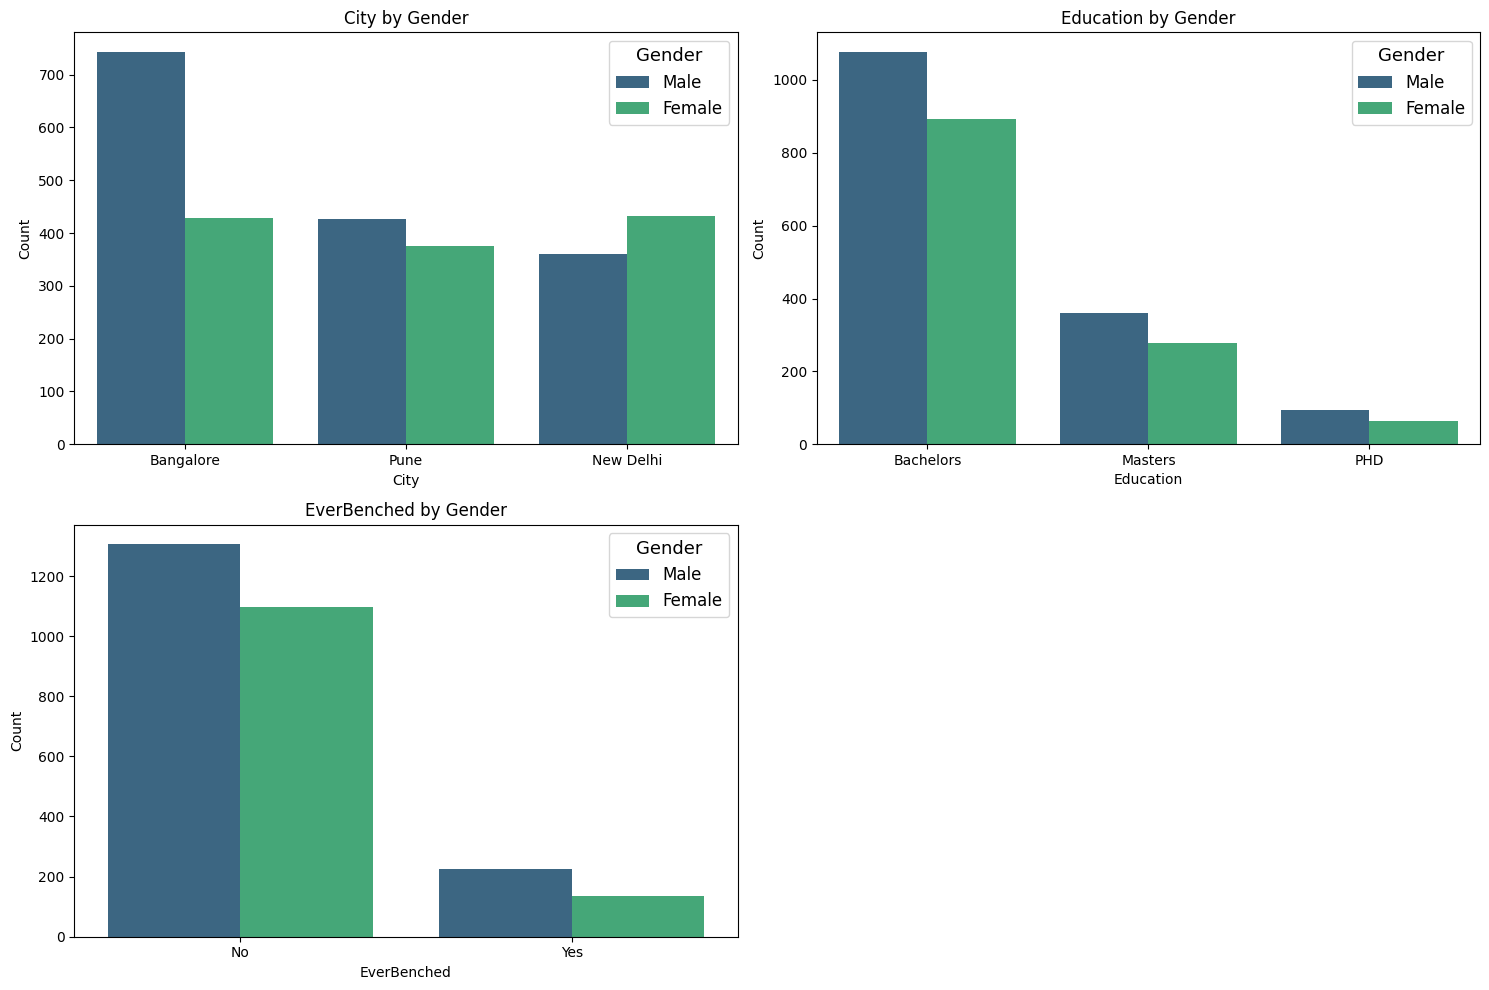

In [51]:
#Gender wise distribution of each categorical column
categorical_columns = ['City', 'Education', 'EverBenched']  # Excluding 'Gender' column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Gender', data=X, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} by Gender')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].legend(title='Gender', fontsize=12, title_fontsize='13')  # Adjust legend font size

# Hide the 4th subplot (bottom right) since we only have 3 plots
axes[3].set_visible(False)

plt.tight_layout()

plt.show()


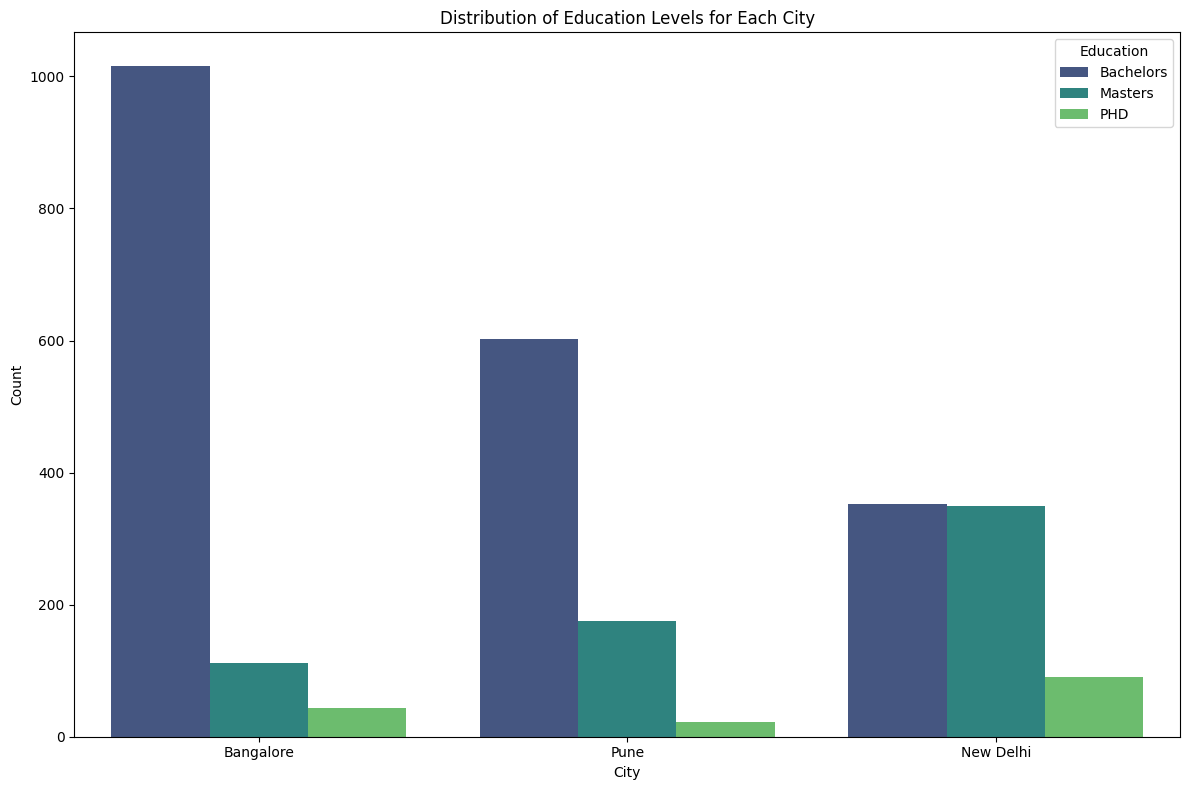

In [52]:
#Distribution of Education for each city
plt.figure(figsize=(12, 8))
sns.countplot(x='City', hue='Education', data=X, palette='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Education Levels for Each City')
plt.legend(title='Education')
plt.tight_layout()
plt.show()


In [53]:
#Converting categorical columns to numerical
X = pd.get_dummies(X)
X

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,True,False,False,True,False,False,False,True,True,False
1,2013,1,28,3,True,False,False,False,False,True,True,False,True,False
2,2014,3,38,2,True,False,False,False,True,False,True,False,True,False
3,2016,3,27,5,False,True,False,True,False,False,False,True,True,False
4,2017,3,24,2,False,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2017,2,31,2,False,True,False,False,False,True,True,False,True,False
4647,2016,3,30,2,True,False,False,False,False,True,False,True,True,False
4649,2013,2,37,2,False,True,False,False,False,True,False,True,True,False
4650,2018,3,27,5,False,True,False,False,True,False,False,True,True,False


In [54]:
#Standardizing the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_scaled, columns=X.columns)
X = X_standardized
X.head()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,1.012701,0.583382,0.596528,-1.642132,0.634298,-0.547250,-0.244573,1.166351,-0.633737,-0.638787,-0.898731,0.898731,0.387594,-0.387594
1,-1.108637,-2.622319,-0.578112,0.220853,0.634298,-0.547250,-0.244573,-0.857374,-0.633737,1.565467,1.112680,-1.112680,0.387594,-0.387594
2,-0.578303,0.583382,1.379621,-0.400142,0.634298,-0.547250,-0.244573,-0.857374,1.577941,-0.638787,1.112680,-1.112680,0.387594,-0.387594
3,0.482367,0.583382,-0.773885,1.462843,-1.576546,1.827318,-0.244573,1.166351,-0.633737,-0.638787,-0.898731,0.898731,0.387594,-0.387594
4,1.012701,0.583382,-1.361206,-0.400142,-1.576546,1.827318,-0.244573,-0.857374,-0.633737,1.565467,-0.898731,0.898731,-2.580021,2.580021


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from matplotlib import pyplot as plt

In [56]:
#Splitting the features X and the target variable y into train and test sets

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
type(y)

pandas.core.series.Series

<Axes: >

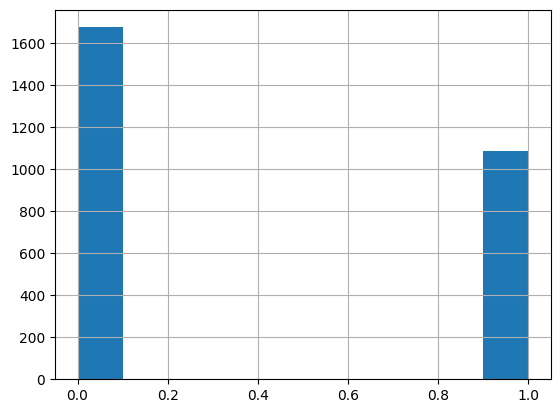

In [62]:
y.hist()

In [58]:
from sklearn.model_selection import KFold
import numpy as np


model = DecisionTreeClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train= X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test =  y.iloc[test_index]


    #Training the model
    model.fit(X_train, y_train)

    #Testing the model
    y_pred = model.predict(X_test)
    #Computing the accuracy of the model on the the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy for each fold is given as:")
print(accuracies)
print("Mean Accuracy: ", np.mean(accuracies))




Accuracy for each fold is given as:
[0.6708860759493671, 0.650994575045208, 0.7088607594936709, 0.6925858951175407, 0.717391304347826]
Mean Accuracy:  0.6881437219907226


In [59]:
from sklearn.model_selection import KFold
import numpy as np


model = SVC()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train= X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test =  y.iloc[test_index]


    #Training the model
    model.fit(X_train, y_train)

    #Testing the model
    y_pred = model.predict(X_test)
    #Computing the accuracy of the model on the the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy for each fold is given as:")
print(accuracies)
print("Mean Accuracy: ", np.mean(accuracies))




Accuracy for each fold is given as:
[0.7649186256781193, 0.7251356238698011, 0.783001808318264, 0.7667269439421338, 0.7554347826086957]
Mean Accuracy:  0.7590435568834027


In [60]:
from sklearn.model_selection import KFold
import numpy as np


model = RandomForestClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train= X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test =  y.iloc[test_index]


    #Training the model
    model.fit(X_train, y_train)

    #Testing the model
    y_pred = model.predict(X_test)
    #Computing the accuracy of the model on the the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy for each fold is given as:")
print(accuracies)
print("Mean Accuracy: ", np.mean(accuracies))




Accuracy for each fold is given as:
[0.7323688969258589, 0.6889692585895117, 0.7414104882459313, 0.7341772151898734, 0.7518115942028986]
Mean Accuracy:  0.7297474906308148


In [61]:
from sklearn.model_selection import KFold
import numpy as np


model = KNeighborsClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train= X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test =  y.iloc[test_index]


    #Training the model
    model.fit(X_train, y_train)

    #Testing the model
    y_pred = model.predict(X_test)
    #Computing the accuracy of the model on the the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy for each fold is given as:")
print(accuracies)
print("Mean Accuracy: ", np.mean(accuracies))




Accuracy for each fold is given as:
[0.7359855334538878, 0.705244122965642, 0.7341772151898734, 0.7197106690777577, 0.7391304347826086]
Mean Accuracy:  0.7268495950939539
